In [1]:
import numpy as np
import pandas as pd
from sklearn.manifold import TSNE

import torch

import matplotlib
import matplotlib.pyplot as plt

manualSeed = 44

print("Random Seed: ", manualSeed)
np.random.seed(manualSeed)
torch.manual_seed(manualSeed)

matplotlib.rcParams.update({'font.size': 20})

Random Seed:  44


## Synthetic Overlap

In [2]:
m = 16
num_sequences = 1000
len_sequence = 60
len_first_dist = 30
len_second_dist = 30

In [3]:
mu1 = np.zeros(m) * 0
mu2 = np.ones(m) * 12
mu7 = np.ones(m) * 4
mu8 = np.ones(m) * 17

mu3 = np.ones(m) * 20
mu4 = np.ones(m) * 40
mu9 = np.ones(m) * 80
mu10 = np.ones(m) * 63

mu5 = np.ones(m) * 1.2
mu6 = np.ones(m) * 13.2
mu11 = np.ones(m) * 5.2
mu12 = np.ones(m) * 15.8
sigma = np.eye(m) * 3

In [4]:
X1 = []
X2 = []
X3 = []

for _ in range(num_sequences):
    first_part1 = np.random.multivariate_normal(mu1, sigma, len_first_dist)
    first_part2 = np.random.multivariate_normal(mu2, sigma, len_first_dist)
    first_part3 = np.random.multivariate_normal(mu3, sigma, len_first_dist)
    first_part4 = np.random.multivariate_normal(mu4, sigma, len_first_dist)
    first_part5 = np.random.multivariate_normal(mu5, sigma, len_first_dist)
    first_part6 = np.random.multivariate_normal(mu6, sigma, len_first_dist)

    second_part1 = np.random.multivariate_normal(mu7, sigma, len_second_dist)
    second_part2 = np.random.multivariate_normal(mu8, sigma, len_second_dist)
    second_part3 = np.random.multivariate_normal(mu9, sigma, len_second_dist)
    second_part4 = np.random.multivariate_normal(mu10, sigma, len_second_dist)
    second_part5 = np.random.multivariate_normal(mu11, sigma, len_second_dist)
    second_part6 = np.random.multivariate_normal(mu12, sigma, len_second_dist)

    sequence_1 = np.vstack((first_part1, second_part1))
    sequence_2 = np.vstack((first_part2, second_part2))
    sequence_3 = np.vstack((first_part3, second_part3))
    sequence_4 = np.vstack((first_part4, second_part4))
    sequence_5 = np.vstack((first_part5, second_part5))
    sequence_6 = np.vstack((first_part6, second_part6))

    X1.append(sequence_1)
    X1.append(sequence_2)
    X2.append(sequence_3)
    X2.append(sequence_4)
    X3.append(sequence_5)
    X3.append(sequence_6)

In [5]:
X1 = np.array(X1)
X2 = np.array(X2)
X3 = np.array(X3)

X1 = X1.reshape(num_sequences * 2 * len_sequence, m)
X2 = X2.reshape(num_sequences * 2 * len_sequence, m)
X3 = X3.reshape(num_sequences * 2 * len_sequence, m)

X = np.concatenate((X1, X2, X3))
Y = np.concatenate((['X1'] * X1.shape[0], ['X2'] * X2.shape[0], ['X3'] * X3.shape[0]))

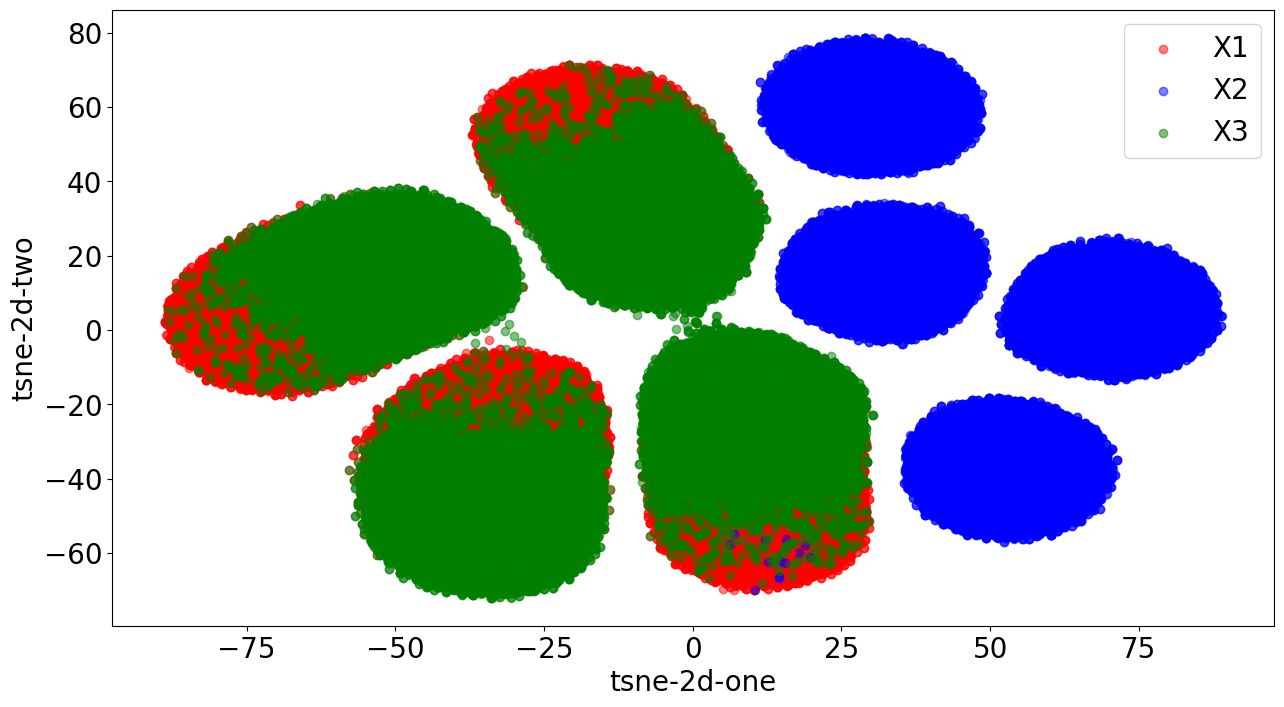

In [6]:
tsne = TSNE(n_components=2, random_state=0)
emb_X = tsne.fit_transform(X)
df_subset = pd.DataFrame()
df_subset['tsne-2d-one'] = emb_X[:, 0]
df_subset['tsne-2d-two'] = emb_X[:, 1]

df_subset['y'] = Y

fig = plt.figure(figsize=(15, 8))
ax = fig.add_subplot(1, 1, 1)
ax.set_xlabel('tsne-2d-one')
ax.set_ylabel('tsne-2d-two')

targets = ['X1', 'X2', 'X3']
colors = ['r', 'b', 'g']

for target, color in zip(targets, colors):
    indicesToKeep = df_subset['y'] == target
    ax.scatter(df_subset.loc[indicesToKeep, 'tsne-2d-one'],
               df_subset.loc[indicesToKeep, 'tsne-2d-two'],
               c=color, alpha=0.5)

ax.legend(targets)
plt.show()

In [7]:
df_train = pd.DataFrame(X1)
df_val_m = pd.DataFrame(X2)
df_val_g = pd.DataFrame(X3)

df_train.to_csv('synthetic_overlap_2_pattern_train_m.csv', index=False)
df_val_m.to_csv('synthetic_overlap_2_pattern_val_m.csv', index=False)
df_val_g.to_csv('synthetic_overlap_2_pattern_val_g.csv', index=False)

## Synthetic

In [10]:
from sklearn.datasets import make_spd_matrix

In [11]:
m = 16
num_sequences = 1000
len_sequence = 60
len_first_dist = 30
len_second_dist = 30

In [12]:
mu1 = np.random.randint(0, 2, m)
mu2 = np.random.randint(3, 5, m)
mu3 = np.random.randint(6, 9, m)
mu4 = np.random.randint(11, 14, m)
mu5 = np.random.randint(15, 18, m)
mu6 = np.random.randint(19, 24, m)
mu7 = np.random.randint(30, 36, m)
mu8 = np.random.randint(40, 43, m)
mu9 = np.random.randint(51, 59, m)
mu10 = np.random.randint(72, 74, m)
mu11 = np.random.randint(83, 86, m)
mu12 = np.random.randint(87, 90, m)

sigma1 = make_spd_matrix(m, random_state=0)
sigma2 = make_spd_matrix(m, random_state=113)
sigma3 = make_spd_matrix(m, random_state=101)
sigma4 = make_spd_matrix(m, random_state=11)
sigma5 = make_spd_matrix(m, random_state=116)
sigma6 = make_spd_matrix(m, random_state=144)
sigma7 = make_spd_matrix(m, random_state=5)
sigma8 = make_spd_matrix(m, random_state=119)
sigma9 = make_spd_matrix(m, random_state=105)
sigma10 = make_spd_matrix(m, random_state=16)
sigma11 = make_spd_matrix(m, random_state=119)
sigma12 = make_spd_matrix(m, random_state=149)

In [13]:
X1 = []
X2 = []
X3 = []

for _ in range(num_sequences):
    first_part1 = np.random.multivariate_normal(mu1, sigma1, len_first_dist)
    first_part2 = np.random.multivariate_normal(mu2, sigma2, len_first_dist)
    first_part3 = np.random.multivariate_normal(mu3, sigma3, len_first_dist)
    first_part4 = np.random.multivariate_normal(mu4, sigma4, len_first_dist)
    first_part5 = np.random.multivariate_normal(mu5, sigma5, len_first_dist)
    first_part6 = np.random.multivariate_normal(mu6, sigma6, len_first_dist)

    second_part1 = np.random.multivariate_normal(mu7, sigma7, len_second_dist)
    second_part2 = np.random.multivariate_normal(mu8, sigma8, len_second_dist)
    second_part3 = np.random.multivariate_normal(mu9, sigma9, len_second_dist)
    second_part4 = np.random.multivariate_normal(mu10, sigma10, len_second_dist)
    second_part5 = np.random.multivariate_normal(mu11, sigma11, len_second_dist)
    second_part6 = np.random.multivariate_normal(mu12, sigma12, len_second_dist)

    sequence_1 = np.vstack((first_part1, second_part1))
    sequence_2 = np.vstack((first_part2, second_part2))
    sequence_3 = np.vstack((first_part3, second_part3))
    sequence_4 = np.vstack((first_part4, second_part4))
    sequence_5 = np.vstack((first_part5, second_part5))
    sequence_6 = np.vstack((first_part6, second_part6))

    X1.append(sequence_1)
    X1.append(sequence_2)
    X2.append(sequence_3)
    X2.append(sequence_4)
    X3.append(sequence_5)
    X3.append(sequence_6)
    
X1 = np.array(X1)
X2 = np.array(X2)
X3 = np.array(X3)

X1 = X1.reshape(num_sequences * 2 * len_sequence, m)
X2 = X2.reshape(num_sequences * 2 * len_sequence, m)
X3 = X3.reshape(num_sequences * 2 * len_sequence, m)

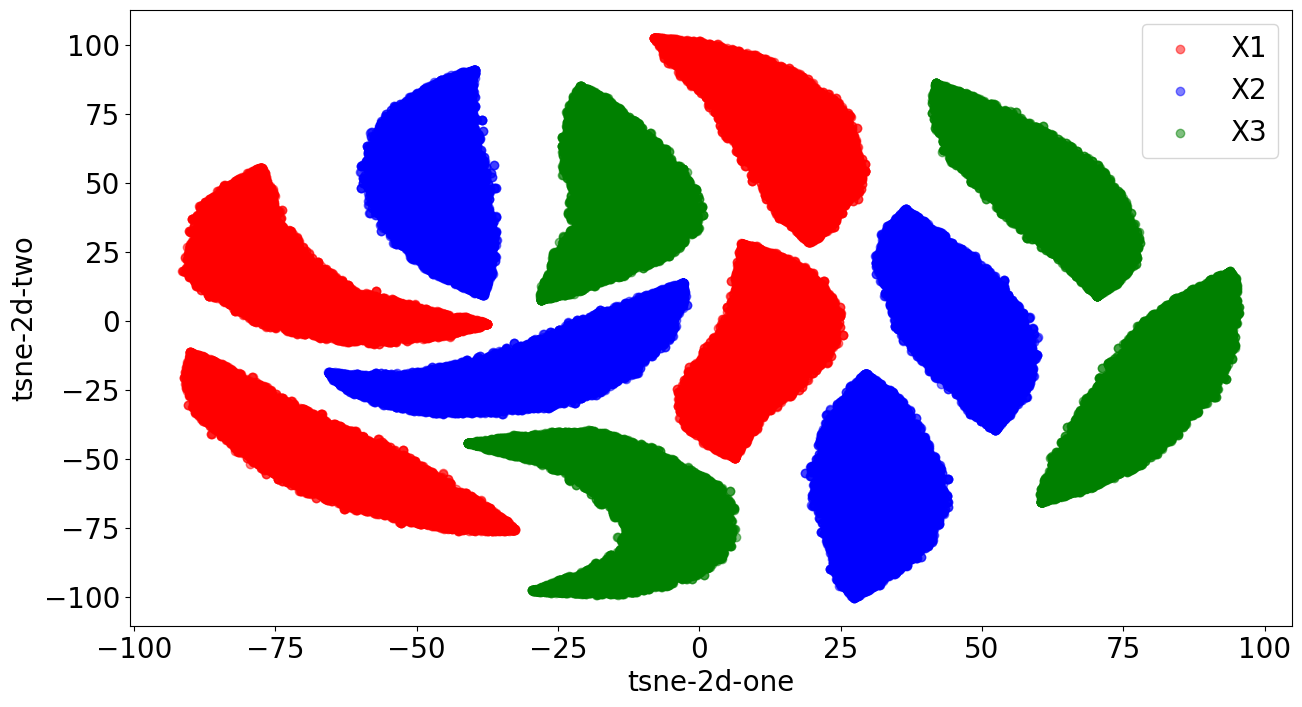

In [14]:
X = np.concatenate((X1, X2, X3))
Y = np.concatenate((['X1'] * X1.shape[0], ['X2'] * X2.shape[0], ['X3'] * X3.shape[0]))
tsne = TSNE(n_components=2, random_state=0)
emb_X = tsne.fit_transform(X)
df_subset = pd.DataFrame()
df_subset['tsne-2d-one'] = emb_X[:, 0]
df_subset['tsne-2d-two'] = emb_X[:, 1]

df_subset['y'] = Y

fig = plt.figure(figsize=(15, 8))
ax = fig.add_subplot(1, 1, 1)
ax.set_xlabel('tsne-2d-one')
ax.set_ylabel('tsne-2d-two')

targets = ['X1', 'X2', 'X3']
colors = ['r', 'b', 'g']

for target, color in zip(targets, colors):
    indicesToKeep = df_subset['y'] == target
    ax.scatter(df_subset.loc[indicesToKeep, 'tsne-2d-one'],
               df_subset.loc[indicesToKeep, 'tsne-2d-two'],
               c=color, alpha=0.5)

ax.legend(targets)
plt.show()

In [15]:
df_train = pd.DataFrame(X1)
df_val_m = pd.DataFrame(X2)
df_val_g = pd.DataFrame(X3)

df_train.to_csv('synthetic_train_m.csv', index=False)
df_val_m.to_csv('synthetic_val_m.csv', index=False)
df_val_g.to_csv('synthetic_val_g.csv', index=False)